In [1]:
from pandas_datareader import data as wb
import pandas as pd

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical data
ticker = "AAPL"
start = "2000-01-01"
end = "2025-08-30"

data = yf.download(ticker, start=start, end=end)

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\2076658738.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Apply the .**head()** and **.tail()** methods to check if the data is ok. Always pay attention to the dates. Try to get an idea about how the stock price changed during the period.

In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.840094,0.844316,0.763168,0.787090,535796800
2000-01-04,0.769266,0.830244,0.759415,0.812419,512377600
2000-01-05,0.780523,0.829775,0.773018,0.778646,778321600
2000-01-06,0.712977,0.803038,0.712977,0.796471,767972800
2000-01-07,0.746750,0.758008,0.716731,0.724235,460734400


In [4]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-25,227.160004,229.300003,226.229996,226.479996,30983100
2025-08-26,229.309998,229.490005,224.690002,226.869995,54575100
2025-08-27,230.490005,230.899994,228.259995,228.610001,31259500
2025-08-28,232.559998,233.410004,229.339996,230.820007,38074700
2025-08-29,232.139999,233.380005,231.369995,232.509995,39389400


### Simple Rate of Return

Calculate the simple returns of ‘AAPL’ for the given timeframe.
$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
data['simple_return'] = (data['Close'] / data['Close'].shift(1)) - 1
print(data['simple_return'])

Date
2000-01-03         NaN
2000-01-04   -0.084310
2000-01-05    0.014633
2000-01-06   -0.086538
2000-01-07    0.047369
                ...   
2025-08-25   -0.002634
2025-08-26    0.009465
2025-08-27    0.005146
2025-08-28    0.008981
2025-08-29   -0.001806
Name: simple_return, Length: 6454, dtype: float64


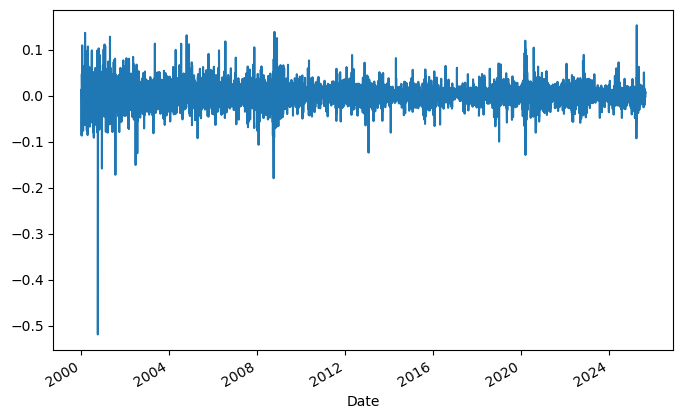

In [6]:
data['simple_return'].plot(figsize=(8, 5))
plt.show()

## Interpreting the graph

The plot is not a smooth line, but jumps up and down (since returns are percentage changes each day).

You’ll notice:

Many small fluctuations (typically within ±1%).

Occasional large negative spikes (big drops, sometimes −20% or −50%).

This matches a well-known fact in finance:

Positive returns tend to be smaller and accumulate gradually over time.

Negative returns can be sudden and much larger (market crashes, earnings shocks, crises).

### 1. Calculating the mean daily return

Now we move from visualization to a summary statistic.

In [7]:
avg_returns_d = data['simple_return'].mean()
avg_returns_d

0.001180526758456278

This number is small (well under 1%).

Example: ~0.0004 → that’s 0.04% average daily return.

Alone, this isn’t very intuitive. So we need to scale it to annual terms.

### 2. Converting daily to annual return

We assume about 252 trading days per year (excluding weekends and holidays).



Annual Return
≈
Mean Daily Return
×
252
Annual Return≈Mean Daily Return×252

In [8]:
avg_returns_a = data['simple_return'].mean() * 252
avg_returns_a

0.29749274313098206

### 3.Making the result more presentable

We can format it as a percentage string:

In [9]:
formatted_return = str(round(avg_returns_a*100, 2)) + "%"
print("avg_returns_a:", formatted_return)

avg_returns_a: 29.75%


Average Annual Return: 29.76%”

### Now I extending what I did with simple returns to logarithmic returns (log returns).

#### Why two types of returns?

Simple returns are intuitive (profit ÷ investment).

Log returns are mathematically convenient because:

    1.They can be easily added over time (time additivity).

    2.They work well for modeling prices using continuous compounding.

     Rule of thumb:

    1.Use simple returns when comparing multiple assets over the same time frame.

    2.Use log returns when studying one asset over long time periods.

## Formula for log returns
For day 
𝑡
t:
$$
ln(\frac{P_t}{P_{t-1}})
$$

In [10]:
data.head()

Price,Close,High,Low,Open,Volume,simple_return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2000-01-03,0.840094,0.844316,0.763168,0.787090,535796800,NaN
2000-01-04,0.769266,0.830244,0.759415,0.812419,512377600,-0.084310
2000-01-05,0.780523,0.829775,0.773018,0.778646,778321600,0.014633
2000-01-06,0.712977,0.803038,0.712977,0.796471,767972800,-0.086538
2000-01-07,0.746750,0.758008,0.716731,0.724235,460734400,0.047369


## What is vectorization (NumPy advantage)?

Normally in Python, we might write a loop:

    returns = []
    for i in range(1, len(prices)):
        r = np.log(prices[i] / prices[i-1])
        returns.append(r)
    
    This works, but it’s slow and messy.

    With NumPy/pandas (vectorization), I can do the whole thing in one line:
    
    Like - df["Log Return"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))


In [11]:

# Create new column for log returns
data["log_return"] = np.log(data["Close"] / data["Close"].shift(1))

# Preview first few rows
print(data[["Close", "simple_return", "log_return"]].head())


Price          Close simple_return log_return
Ticker          AAPL                         
Date                                         
2000-01-03  0.840094           NaN        NaN
2000-01-04  0.769266     -0.084310  -0.088078
2000-01-05  0.780523      0.014633   0.014527
2000-01-06  0.712977     -0.086538  -0.090514
2000-01-07  0.746750      0.047369   0.046281


   **np.log() → natural log**

   **.shift(1) →** lags the series by 1 trading day means- line up each day’s data with yesterday’s value

In [12]:
data.head()

Price,Close,High,Low,Open,Volume,simple_return,log_return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2000-01-03,0.840094,0.844316,0.763168,0.787090,535796800,NaN,NaN
2000-01-04,0.769266,0.830244,0.759415,0.812419,512377600,-0.084310,-0.088078
2000-01-05,0.780523,0.829775,0.773018,0.778646,778321600,0.014633,0.014527
2000-01-06,0.712977,0.803038,0.712977,0.796471,767972800,-0.086538,-0.090514
2000-01-07,0.746750,0.758008,0.716731,0.724235,460734400,0.047369,0.046281


In [13]:
data[["log_return"]]

Price,log_return
Ticker,
Date,
2000-01-03,NaN
2000-01-04,-0.088078
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046281
...,...
2025-08-25,-0.002638
2025-08-26,0.009420


First row will again be NaN (since there’s no previous price on Jan 3, 2000).

#### Why use log returns when analyzing one stock over time?

Time additivity: log returns sum neatly across periods.

#### Why is the average log return smaller than the average simple return?

    This is because of volatility.

Imagine two days:

Day 1: +50% (stock goes up)

Day 2: -50% (stock goes down)

Simple average = +50.
 Looks like you broke even.

    But actually:
        Start with $100 → $150 → $75. You lost money!

Log returns capture this reality. They give a smaller average return because they account for the fact that ups and downs don’t cancel out perfectly (this is called volatility drag).

#### Similarly as i calculated for Simple Reture I will calculate for Log return

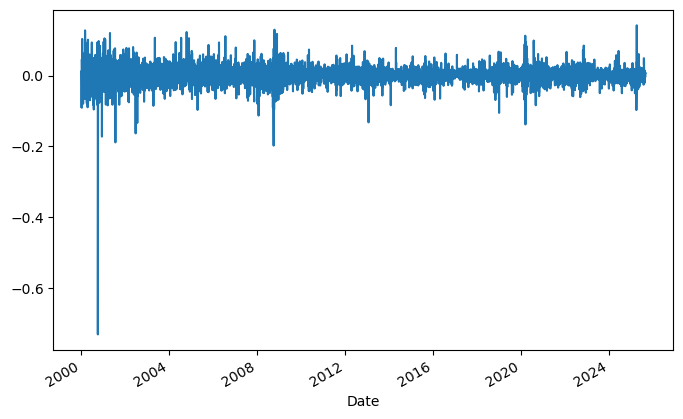

In [14]:
data['log_return'].plot(figsize=(8, 5))
plt.show()

### Interpretation 

   **1.The Dot-com Bubble Burst (Early 2000s):** The sharpest and most dramatic downward spike on the chart occurs around the year 2002. This likely represents the collapse of the dot-com bubble, which began in March 2000 and continued into 2002.

  **2.The 2008 Global Financial Crisis:** The next period of high volatility, characterized by a substantial drop, occurs around 2008.

   **3.The COVID-19 Pandemic (2020):** The graph shows a sudden, sharp V-shaped drop and quick recovery around the year 2020
    
   **4.Us Tariff**  impact showing in this plot - Recent in 2025 U.S. tariffs implemented in 2025 om many countries and their expected impact on the economy.

In [15]:
log_return_d = data['log_return'].mean()
log_return_d

0.0008711578587726554

In [16]:
log_return_a = data['log_return'].mean() * 250
log_return_a

0.21778946469316385

In [17]:
print(str(round(log_return_a, 5) * 100) + ' %')

21.779 %


## Calculating the Return of a Portfolio of Securities

    I selected Procter & Gamble (PG), Microsoft (MSFT), Ford (F), and General Electric (GE) because each represents a different sector of the U.S. economy—consumer staples, technology, automotive, and industrial manufacturing. 
         This gives us a broad perspective on how tariffs affect multiple industries

##### Together, they validate how tariffs affect consumer spending, tech supply chains, autos, and industrial strategy.

In [18]:
import yfinance as yf

stocks = ["PG", "MSFT", "F", "GE"]
data_p = yf.download(stocks, start="2000-01-01", end="2025-08-30", auto_adjust=False)["Adj Close"]
data_p.head()

[*********************100%***********************]  4 of 4 completed


Ticker,F,GE,MSFT,PG
Date,,,,
2000-01-03,11.617765,129.933243,35.668083,27.213198
2000-01-04,11.229582,124.735893,34.463215,26.689560
2000-01-05,11.271176,124.519424,34.826561,26.181784
2000-01-06,11.285037,126.184174,33.659962,27.387745
2000-01-07,12.116858,131.070160,34.099831,29.577490


In [19]:
data_p.tail()

Ticker,F,GE,MSFT,PG
Date,,,,
2025-08-25,11.82,266.609985,504.260010,156.149994
2025-08-26,11.84,273.940002,502.040009,155.970001
2025-08-27,11.91,273.350006,506.739990,156.960007
2025-08-28,11.71,276.000000,509.640015,155.649994
2025-08-29,11.77,275.200012,506.690002,157.039993


In [20]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6454 entries, 2000-01-03 to 2025-08-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       6454 non-null   float64
 1   GE      6454 non-null   float64
 2   MSFT    6454 non-null   float64
 3   PG      6454 non-null   float64
dtypes: float64(4)
memory usage: 252.1 KB


### Normalize the prices

Why normalize?
Because stock prices differ (MSFT may be $30, PG $70, Ford $10, etc.), and we want to compare them as if they all started at the same level (100).

 Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [21]:
data_p.iloc[0]

Ticker
F        11.617765
GE      129.933243
MSFT     35.668083
PG       27.213198
Name: 2000-01-03 00:00:00, dtype: float64

### Now all stocks start at 100 on day 1 → easy to compare growth paths.

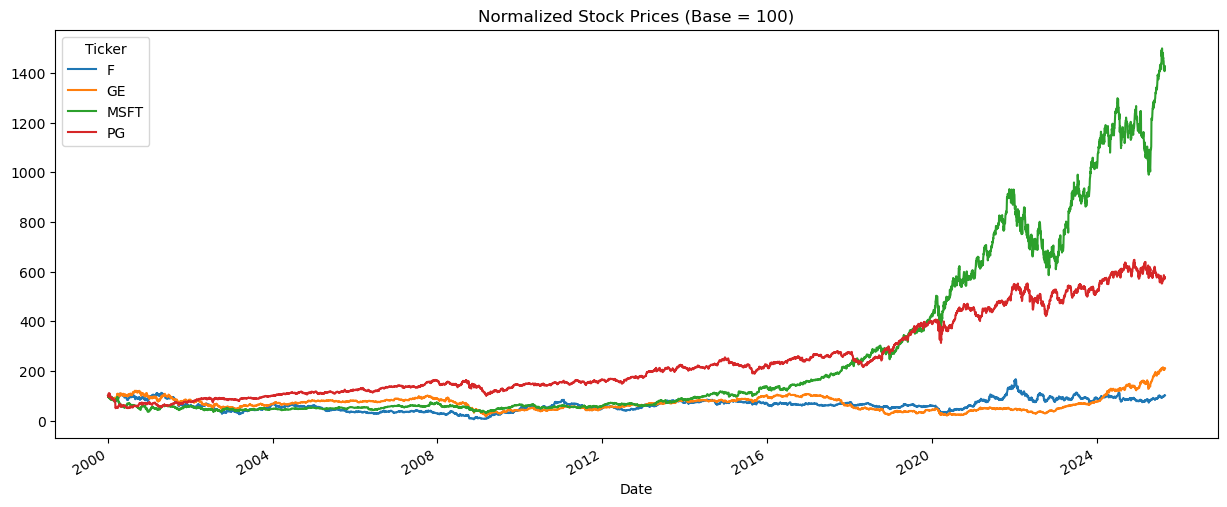

In [22]:
(data_p / data_p.iloc[0] * 100).plot(figsize = (15, 6));
plt.title("Normalized Stock Prices (Base = 100)")
plt.show()

    Microsoft (MSFT): This is the outperformer of the group. The stock shows explosive growth, particularly from 2018 to 2025. Procter & Gamble (PG): This is the stable growth stock.

    Ford (F) & General Electric (GE): These are the underperformers of the group. Their prices have remained relatively flat over the last 25 years, failing to generate significant returns compared to the others.

Microsoft's recent outperformance is driven by its dominance in cloud computing (Azure) and a significant push into Artificial Intelligence (AI), with strong Q2 2025 earnings showing revenue growth and heightened investor confidence. 

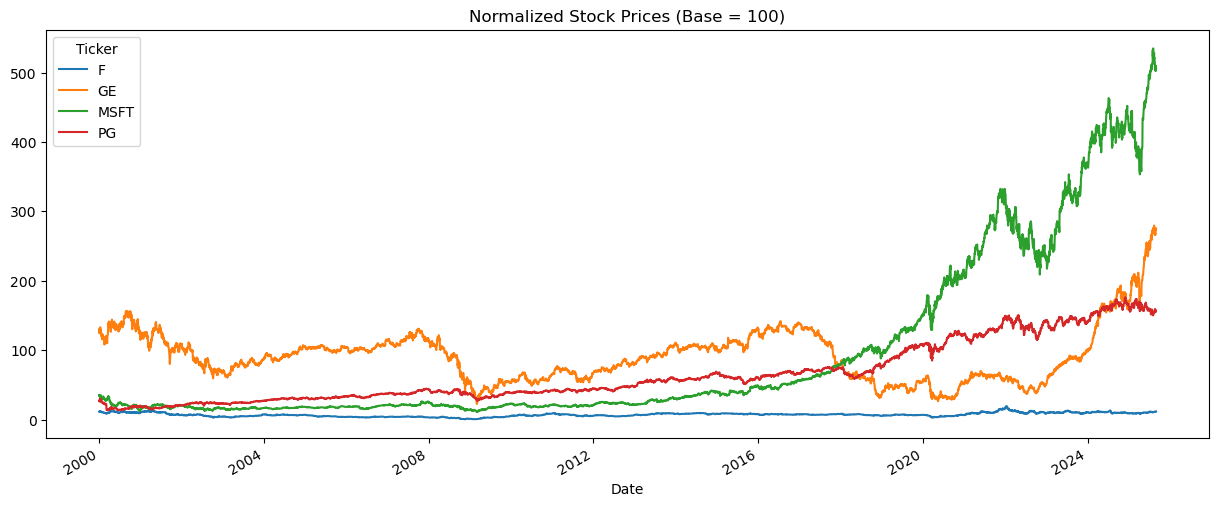

In [23]:
data_p.plot(figsize=(15,6))
plt.title("Normalized Stock Prices (Base = 100)")
plt.show()

In [24]:
data_p.loc['2000-01-03']

Ticker
F        11.617765
GE      129.933243
MSFT     35.668083
PG       27.213198
Name: 2000-01-03 00:00:00, dtype: float64

In [25]:
data_p.iloc[0]

Ticker
F        11.617765
GE      129.933243
MSFT     35.668083
PG       27.213198
Name: 2000-01-03 00:00:00, dtype: float64

### Now we Calculate Simple daily returns

In [26]:
returns = (data_p / data_p.shift(1)) - 1
returns.head()
returns.tail()

Ticker,F,GE,MSFT,PG
Date,,,,
2025-08-25,0.006814,0.000300,-0.005855,-0.015882
2025-08-26,0.001692,0.027493,-0.004402,-0.001153
2025-08-27,0.005912,-0.002154,0.009362,0.006347
2025-08-28,-0.016793,0.009695,0.005723,-0.008346
2025-08-29,0.005124,-0.002899,-0.005788,0.008930


In [27]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

#### Portfolio return (equal weights)

    If each stock has 25% weight, we do a dot product:

In [28]:
np.dot(returns, weights)

array([        nan, -0.03160879, -0.00162842, ...,  0.00486689,
       -0.00243033,  0.00134181])

#### Compute average annual returns

    There are about 250 trading days in a year.

In [29]:
annual_returns = returns.mean() * 250
annual_returns

Ticker
F       0.086831
GE      0.083724
MSFT    0.147817
PG      0.089866
dtype: float64

In [30]:
np.dot(annual_returns, weights)

0.10205959184215918

In [31]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print(pfolio_1)

10.206 %


### Portfolio return (custom weights)

Example: 40% MSFT, 40% PG, 15% GE, 5% Ford.

In [32]:
weights_2 = np.array([0.15, 0.05, 0.4, 0.4])

#### Compare results

I simply printed both portfolio returns:

In [33]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print(pfolio_1)
print(pfolio_2)

10.206 %
11.228 %


    Now we can see clearly that in portfolio_2 has performed better due to assigned Weights comparison to portfolio_1 -  2nd performed better.

## What is a market index

    A market index is like a “thermometer” for a stock market. It gives a single number that shows how the overall market is performing.

### Why stock indices are important

    Benchmarking: Compare your stock’s performance to the overall market or a sector.

    Example: If your tech stock returned 15% but Nasdaq returned 20%, your stock underperformed the tech sector.

    Investment expectations: Indices give an idea of returns from a diversified portfolio.

    Instead of picking one stock, you can invest in an index to capture average market returns.

    Historical analysis: Look at past returns to understand market trends and volatility.

Market indices summarize performance of a group of stocks.

S&P 500 = U.S. large-cap, market-cap weighted → best representation of U.S. market.

DJIA = U.S., 30 large companies, price-weighted → historically important but limited.

Nasdaq = tech-heavy U.S. index → shows tech sector performance.

Foreign/global indices allow global market benchmarking.

Use indices to compare your investments and understand market trends.

### We are moving from individual stock analysis to market indices analysis:

I pick major indices:

**^GSPC** → S&P 500 (500 largest U.S. companies)

**^IXIC** → Nasdaq (mostly tech-heavy)

**^GDAXI** → German DAX (top 30 German companies)

**^FTSE** → London FTSE 100 (UK top 100 companies)

## Downloading and preparing the data
I used the same Python libraries:

In [96]:
# List of tickers to fetch
tickers = ['^GSPC', '^DJI', '^IXIC', '^RUT']

# Create an empty DataFrame to store the data
ind_data = pd.DataFrame()

# Loop through the tickers and download the adjusted close price
for t in tickers:
    try:
        data = yf.download(t, start='2000-01-01')['Close']
        ind_data[t] = data
    except Exception as e:
        print(f"Error downloading data for {t}: {e}")

# Display the first few rows of the DataFrame
print(ind_data.head())

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\3453252283.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start='2000-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\3453252283.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start='2000-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\3453252283.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start='2000-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\3453252283.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, st

                  ^GSPC          ^DJI        ^IXIC        ^RUT
Date                                                          
2000-01-03  1455.219971  11357.509766  4131.149902  496.420013
2000-01-04  1399.420044  10997.929688  3901.689941  478.380005
2000-01-05  1402.109985  11122.650391  3877.540039  478.829987
2000-01-06  1403.449951  11253.259766  3727.129883  475.339996
2000-01-07  1441.469971  11522.559570  3882.620117  488.309998


**Russell 2000 (^RUT)**

    The Russell 2000 is a stock market index that measures the performance of 2,000 small-cap U.S. companies.

**Nasdaq Composite (^IXIC)**

    The Nasdaq Composite is a stock market index that includes almost all stocks listed on the Nasdaq stock exchange.

**Dow Jones Industrial Average (^DJI)**

    The Dow Jones Industrial Average (DJIA) is a stock market index that measures the stock performance of 30 large, publicly owned companies

**S&P 500 (^GSPC)**

    The S&P 500 is a stock market index that tracks the performance of 500 of the largest publicly traded companies

In [97]:
ind_data.head()

,^GSPC,^DJI,^IXIC,^RUT
Date,,,,
2000-01-03,1455.219971,11357.509766,4131.149902,496.420013
2000-01-04,1399.420044,10997.929688,3901.689941,478.380005
2000-01-05,1402.109985,11122.650391,3877.540039,478.829987
2000-01-06,1403.449951,11253.259766,3727.129883,475.339996
2000-01-07,1441.469971,11522.559570,3882.620117,488.309998


In [98]:
ind_data.tail()

,^GSPC,^DJI,^IXIC,^RUT
Date,,,,
2025-08-25,6439.319824,45282.468750,21449.289062,2339.169922
2025-08-26,6465.939941,45418.070312,21544.269531,2358.600098
2025-08-27,6481.399902,45565.230469,21590.140625,2373.800049
2025-08-28,6501.859863,45636.898438,21705.160156,2378.409912
2025-08-29,6460.259766,45544.878906,21455.550781,2366.419922


## Normalizing indices for comparison

I normalize all indices to 100 at the start. This makes it easy to compare their relative growth, regardless of absolute price differences.

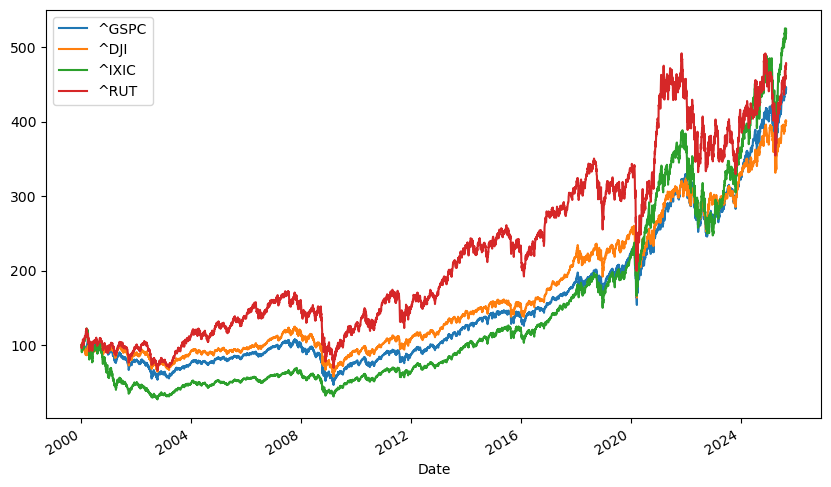

In [99]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(10, 6));
plt.show()

## Interpreting the chart

From the chart:

2001–2003 → Nasdaq declines sharply after dotcom crash.

2007–2008 → Global financial crisis → all indices drop.

2011 → Sovereign debt crisis → minor dips, especially in Europe.

Long-term trend → All indices show growth over 20+ years.

### Calculating simple annual returns

In [100]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

ind_returns.tail()

,^GSPC,^DJI,^IXIC,^RUT
Date,,,,
2025-08-25,-0.004266,-0.007654,-0.002198,-0.009645
2025-08-26,0.004134,0.002995,0.004428,0.008306
2025-08-27,0.002391,0.003240,0.002129,0.006444
2025-08-28,0.003157,0.001573,0.005327,0.001942
2025-08-29,-0.006398,-0.002016,-0.011500,-0.005041


In [101]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC    0.076540
^DJI     0.070734
^IXIC    0.094831
^RUT     0.090281
dtype: float64

## Comparing a stock with indices

Suppose we want to compare P&G with the S&P 500 and Dow Jones:

In [102]:
tickers = ['PG', '^GSPC', '^DJI']

# Create an empty DataFrame to store the data
data_2 = pd.DataFrame()

# Loop through the tickers and download the closing price
for t in tickers:
    try:
        data = yf.download(t, start='2007-01-01')['Close']
        data_2[t] = data
    except Exception as e:
        print(f"Error downloading data for {t}: {e}")

# Display the first few rows of the DataFrame
print(data_2.head())

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\2407381251.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start='2007-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\2407381251.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start='2007-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\2407381251.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start='2007-01-01')['Close']
[*********************100%***********************]  1 of 1 completed

                   PG        ^GSPC          ^DJI
Date                                            
2007-01-03  37.885502  1416.599976  12474.519531
2007-01-04  37.597855  1418.339966  12480.690430
2007-01-05  37.275005  1409.709961  12398.009766
2007-01-08  37.357178  1412.839966  12423.490234
2007-01-09  37.263252  1412.109985  12416.599609


In [103]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2025-08-25,156.149994,6439.319824,45282.468750
2025-08-26,155.970001,6465.939941,45418.070312
2025-08-27,156.960007,6481.399902,45565.230469
2025-08-28,155.649994,6501.859863,45636.898438
2025-08-29,157.039993,6460.259766,45544.878906


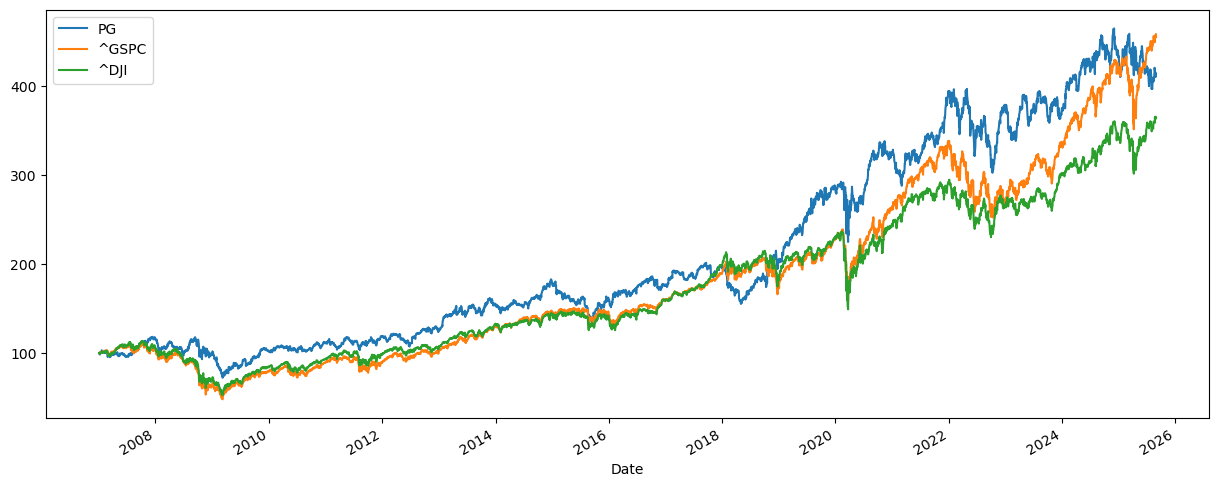

In [104]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

The 2008 Financial Crisis is clearly visible as a sharp, synchronized drop across all three lines. All assets rebounded and continued their climb afterward.

The 2020 COVID-19 market crash is also visible as a sharp dip, followed by an even more aggressive recovery, particularly for the S&P 500 and the Dow Jones.

### Comparison Analysis
PG Stock vs. the Indices (^GSPC and ^DJI):

1.Early Outperformance: From 2007 to around 2018, PG's performance was quite similar to the S&P 500 and the Dow.

2.Post-2018 Performance: After 2018, PG's stock has clearly outperformed both indices. Its growth trajectory is steeper and more consistent, especially from 2019 onwards.

3.Volatility: PG appears to be less volatile than the broader indices. 

### S&P 500 (^GSPC) vs. Dow Jones (^DJI):

    1.Highly Correlated: The S&P 500 and the Dow Jones Industrial Average track each other very closely, as expected. 

    2.Slight Outperformance by S&P 500: Over the entire period, the S&P 500 appears to have slightly outperformed the Dow Jones Industrial Average,

## Risk & Return

Return = how much money you expect to make on your investment (e.g., 15% average per year).

Risk = uncertainty about the return. You don’t know exactly what you’ll get; returns vary each year.

### Measuring risk with statistics

We need a way to quantify this variability.
Two common measures are:

Variance (σ²) = average squared deviation of returns from the mean.

Standard Deviation (σ) = square root of variance, easier to interpret because it’s in the same units as returns.

   **Variance tells us how spread out returns are.**

    Standard deviation is the square root of variance and is the most common measure of risk.

    Higher standard deviation → higher uncertainty → higher risk.

### Measuring a stock’s risk (volatility) using Python.

**PG (Procter & Gamble):** A major American multinational consumer goods corporation that sells a wide range of everyday products, from household cleaners to personal care items.

**BEI.DE (Beiersdorf AG):** A German multinational company that manufactures personal care and cosmetics products

In [105]:
tickers = ['PG', 'BEI.DE']
sec_data = pd.DataFrame()

for t in tickers:
    try:
        data = yf.download(t, start='2006-01-01')['Close']
        sec_data[t] = data
    except Exception as e:
        print(f"Error downloading data for {t}: {e}")

# Display the first few rows of the DataFrame
print(sec_data.head())

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\2749942137.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start='2006-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\2749942137.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start='2006-01-01')['Close']
[*********************100%***********************]  1 of 1 completed

                   PG     BEI.DE
Date                            
2006-01-03  33.791237  27.664934
2006-01-04  33.854469  27.646778
2006-01-05  33.745258  27.545626
2006-01-06  33.710766  27.618250
2006-01-09  33.963699  27.558596


In [106]:
sec_data.tail()

,PG,BEI.DE
Date,,
2025-08-25,156.149994,99.180000
2025-08-26,155.970001,98.680000
2025-08-27,156.960007,98.919998
2025-08-28,155.649994,99.320000
2025-08-29,157.039993,98.239998


### Calculating returns

Instead of simple returns, I used logarithmic returns (log returns).

    Why log returns?

 **They are easier to add up across time.**

 **They better represent how stocks behave over time.**

In [107]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [108]:
sec_returns

,PG,BEI.DE
Date,,
2006-01-03,NaN,NaN
2006-01-04,0.001870,-0.000656
2006-01-05,-0.003231,-0.003665
2006-01-06,-0.001023,0.002633
2006-01-09,0.007475,-0.002162
...,...,...
2025-08-25,-0.016010,-0.003824
2025-08-26,-0.001153,-0.005054
2025-08-27,0.006327,0.002429


## PG

**Mean return and standard deviation**

First, calculate daily mean return using .mean() on each column.

Then annualize the return: (250 = trading days in a year)

In [109]:
sec_returns['PG'].mean()

0.0003106772502168608

In [110]:
sec_returns['PG'].mean() * 250

0.07766931255421519

In [111]:
sec_returns['PG'].std()

0.011509771306601012

In [112]:
sec_returns['PG'].std() * 250 ** 0.5

0.181985463382557

## Beiersdorf

In [113]:
sec_returns['BEI.DE'].mean()

0.0002402909582797827

In [114]:
sec_returns['BEI.DE'].mean() * 250

0.060072739569945674

In [115]:
sec_returns['BEI.DE'].std()

0.013566817600913234

In [116]:
sec_returns['BEI.DE'].std() * 250 ** 0.5

0.21451022109473544

## Results interpretation

P&G → lower average return, lower volatility.

Beiersdorf → higher average return, but also higher volatility.

**Lesson:**

Higher return often comes with higher risk.

### Final result

In [117]:
print(sec_returns['PG'].mean() * 250)
print(sec_returns['BEI.DE'].mean() * 250)

0.07766931255421519
0.060072739569945674


In [118]:
sec_returns[['PG', 'BEI.DE']].mean() * 250

PG        0.077669
BEI.DE    0.060073
dtype: float64

### Combining results

You can print results separately (one mean + std for PG, another for BEI).
But if you want to **put them together** (in a matrix or table), you need to handle Python objects correctly:

A **single pair of brackets** df['PG'] returns a **Series** (1D).

A **double pair of brackets** df[['PG']] returns a **DataFrame** (2D).

When you try to store results in NumPy arrays or do matrix operations, you need **2D objects.**

In [119]:
sec_returns[['PG', 'BEI.DE']].std() * 250 ** 0.5

PG        0.181985
BEI.DE    0.214510
dtype: float64

## Using Python to compute covariance & correlation 
instead of doing the math by hand

Covariance = raw measure of how two variables move together.

Correlation = standardized version of covariance, easy to compare across datasets.

In finance, correlation helps us understand whether stocks tend to move together (and how strongly).

### Covariance Matrix

    A covariance matrix shows how variables move together.

   **On the diagonal →** the variance of each variable (since covariance with itself = variance).

   **Off-diagonal cells →** the covariance between two different variables.
   
   
   

### Covariance matrix of daily returns

ovariance measures how **two variables move together**.

\[
\text{Cov}(X, Y) = \frac{\sum_{i=1}^{N} (X_i - \bar{X})(Y_i - \bar{Y})}{N - 1}
\]

- \(X_i\) = value of variable \(X\)  
- \(Y_i\) = value of variable \(Y\)  
- \(\bar{X}, \bar{Y}\) = means of \(X\) and \(Y\)  
- \(N\) = number of observations  


In [120]:
PG_var = sec_returns['PG'].var() 
PG_var

0.00013247483553025598

In [121]:
BEI_var = sec_returns['BEI.DE'].var() 
BEI_var

0.00018405853981644913

#### Annualized

In [122]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.033118708882564

In [123]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.04601463495411228

In [124]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000132,0.000040
BEI.DE,0.000040,0.000184


In [125]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PG,BEI.DE
PG,0.033119,0.009952
BEI.DE,0.009952,0.046015


In [126]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.254434
BEI.DE,0.254434,1.000000


### Result
Diagonal = 1 (a stock is perfectly correlated with itself).

Off-diagonal = correlation between PG and Beiersdorf returns (usually a small positive number, not too strong).

### This looks like Algebra (A+B)²

\\[
(A + B)^2 = A^2 + 2AB + B^2
\\]

\\[
w_1 + w_2 = 1
\\]


### The Formula

For two stocks (Stock 1 and Stock 2), portfolio variance is:

\\[
\sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1 w_2 \text{Cov}(r_1, r_2)
\\]


Covariance measures how **two variables move together**.

**Formula:**


\\[
{Cov}(r_1, r_2) = \rho_{12}*\sigma_1*\sigma_2
\\]


Correlation is a **standardized version of covariance**, so the value always lies between **-1 and +1**.

**Formula:**

\\[
\text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
\\]

where:

- \\(\text{Cov}(X,Y)\) = covariance of \(X\) and \(Y\\) 

- \\(\sigma_X, \sigma_Y\) = standard deviations of \(X\) and \(Y\\)  

**NOTE**

**\text{Corr}(X, Y) →** writes “Corr(X, Y)” as normal text in math mode.

**\frac{ ... }{ ... } →** fraction with numerator and denominator.

**\text{Cov}(X,Y) →** writes “Cov(X,Y)” as normal text.

**\sigma_X \cdot \sigma_Y →** σₓ × σᵧ, using Greek letters and multiplication.

**\[ ... \] →**  centers the equation on its own line.

## 1. Portfolio Weights

I took a portfolio with two stocks: P&G and Beiersdorf.

Portfolio is equally weighted, you invest 50% in P&G and 50% in Beiersdorf.


In [127]:
weights = np.array([0.5, 0.5])
#Here, weights is a vector representing the proportion of money allocated to each stock.



### 2. Covariance Matrix

Each stock has variance (its individual risk) and covariance (how they move relative to each other).

For two stocks, the covariance matrix looks like this:

\\[
\mathbf{\Sigma} =
\begin{bmatrix}
\sigma_{\text{PG}}^2 & \text{Cov}(r_{\text{PG}}, r_{\text{Beiersdorf}}) \\
\text{Cov}(r_{\text{Beiersdorf}}, r_{\text{PG}}) & \sigma_{\text{Beiersdorf}}^2
\end{bmatrix}
\\]


### 3. Portfolio Variance Formula

Mathematically, for a portfolio of two assets:

\\[
\sigma_p^2 =
\begin{bmatrix} 0.5 & 0.5 \end{bmatrix}
\begin{bmatrix}
\sigma_{\text{PG}}^2 & \text{Cov}(r_{\text{PG}}, r_{\text{Beiersdorf}}) \\
\text{Cov}(r_{\text{Beiersdorf}}, r_{\text{PG}}) & \sigma_{\text{Beiersdorf}}^2
\end{bmatrix}
\begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}
\\]


In [128]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.024759499233232663

### 4. Using NumPy for Matrix Multiplication

NumPy provides the dot product to implement this formula:

### 5. Portfolio Volatility

Volatility = standard deviation, which is the square root of variance:

\\[
\sigma_p = \sqrt{
\begin{bmatrix} 0.5 & 0.5 \end{bmatrix}
\begin{bmatrix}
\sigma_{\text{PG}}^2 & \text{Cov}(r_{\text{PG}}, r_{\text{Beiersdorf}}) \\
\text{Cov}(r_{\text{Beiersdorf}}, r_{\text{PG}}) & \sigma_{\text{Beiersdorf}}^2
\end{bmatrix}
\begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}
}
\\]


In [129]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.15735151487428606

In [130]:
print(str(round(pfolio_vol, 5) * 100) + ' %')

15.735 %


## Portfolio Risk Components

    A portfolio’s total risk (variance or volatility) can be seen as made of two parts:

    Variance of individual securities – the inherent variability of each stock.

    Covariance between securities – how stocks move relative to one another.

**2. Systematic Risk (Market Risk)**

**Definition:** Risk that affects all stocks in the market.

Cause: Macroeconomic events like recessions, wars, natural disasters, changes in interest rates, or a global pandemic.

Key Point: You cannot eliminate systematic risk through diversification. It is inherent to the market.

Example: If a recession hits, almost all companies’ stock prices fall—no matter which industry.

**3. Unsystematic Risk (Idiosyncratic Risk)**

**Definition:** Risk that is specific to a company or industry.

Cause: Company-specific events like poor management decisions, product recalls, or industry-specific issues.

Key Point: This risk can be reduced or almost eliminated by diversification.

Example: A tech stock underperforms due to a software bug, but your other investments in unrelated sectors aren’t affected.

## Diversification Effect

By holding many stocks in a portfolio (25–30 or more), especially uncorrelated stocks, unsystematic risk can nearly disappear.

#### Why This Matters

Understanding the difference between systematic and unsystematic risk helps investors manage risk effectively.

## Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

### Diversifiable Risk:

### 1. Portfolio Weights

In [131]:
weights = np.array([0.5, 0.5])


In [132]:
weights[0]

0.5

In [133]:
weights[1]

0.5

### 2. Portfolio Variance

In [134]:
PG_var_a = sec_returns[['PG']].var() * 250
PG_var_a

PG    0.033119
dtype: float64

In [135]:
BEI_var_a = sec_returns[['BEI.DE']].var() * 250
BEI_var_a

BEI.DE    0.046015
dtype: float64

In [136]:
dr = pfolio_var - (weights[0] ** 2 * PG_var_a) - (weights[1] ** 2 * BEI_var_a)
dr

BEI.DE   NaN
PG       NaN
dtype: float64

In [137]:
float(PG_var_a)

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24472\2706030445.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(PG_var_a)


0.033118708882564

In [138]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.033118708882564

In [139]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.04601463495411228

In [140]:
dr = pfolio_var - (weights[0] ** 2 * PG_var_a) - (weights[1] ** 2 * BEI_var_a)
dr

0.004976163274063592

In [141]:
print(str(round(dr*100, 3)) + ' %')

0.498 %


## Non- Diversifiable Risk

In [142]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.01978333595916907

In [143]:
n_dr_2 = (weights[0] ** 2 * PG_var_a) + (weights[1] ** 2 * BEI_var_a)
n_dr_2

0.01978333595916907

In [144]:
n_dr_1 == n_dr_2

True